In [1]:
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# time-related stack
from datetime import datetime as dt

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/daily_gold_rate.csv')

In [3]:
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1/1/1985,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1/2/1985,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1/3/1985,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1/4/1985,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1/7/1985,298.25,392.55,261.17,3741.23,1091.58,835.8


In [4]:
print(df.isnull().sum())


Date    0
USD     0
EUR     0
GBP     0
INR     0
AED     0
CNY     4
dtype: int64


In [5]:
df.fillna(method='ffill', inplace=True)

In [6]:
print(df.isnull().sum())

Date    0
USD     0
EUR     0
GBP     0
INR     0
AED     0
CNY     4
dtype: int64


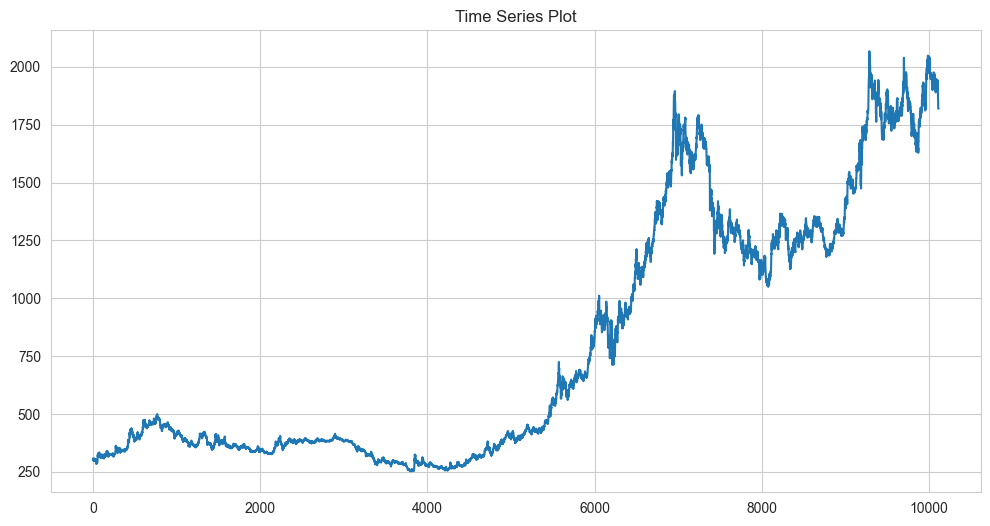

In [7]:
import matplotlib.pyplot as plt

# Plot the time series
df['USD'].plot(figsize=(12, 6))
plt.title('Time Series Plot')
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

# ADF test
result = adfuller(df['USD'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.08926533923191854
p-value: 0.9653205005414079


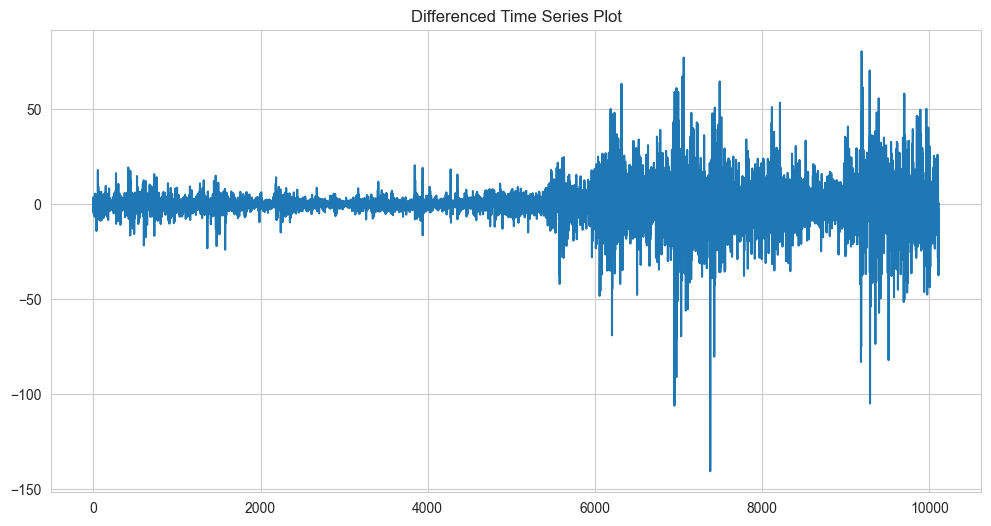

In [9]:
data_diff = df['USD'].diff().dropna()

# Plot differenced data
data_diff.plot(figsize=(12, 6))
plt.title('Differenced Time Series Plot')
plt.show()

In [10]:
result = adfuller(data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.96652695649499
p-value: 9.225551498256553e-30


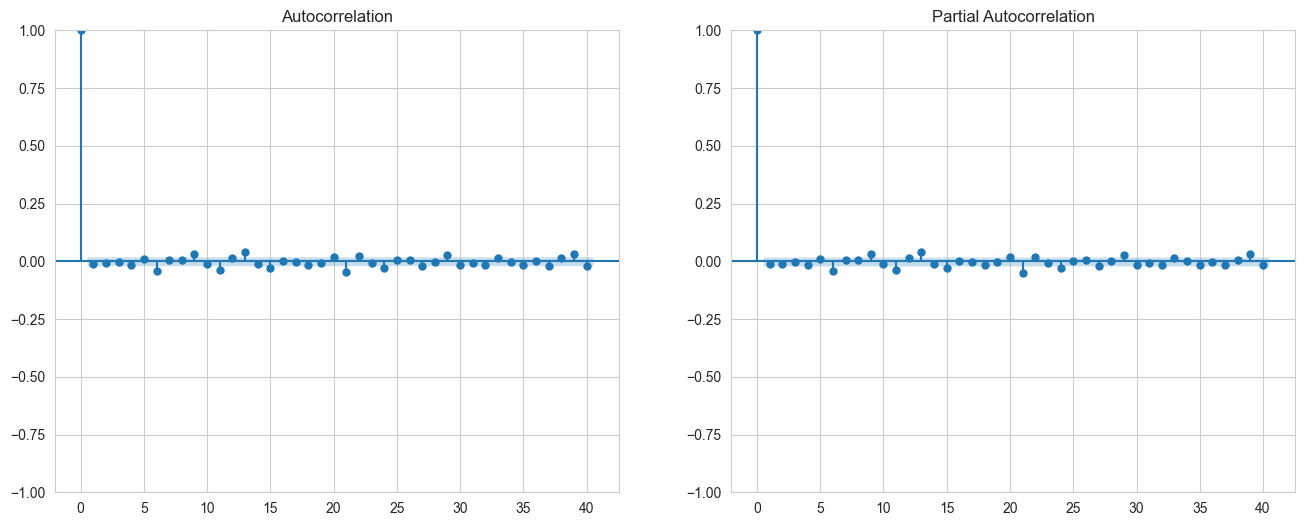

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data_diff, lags=40, ax=axes[0])
plot_pacf(data_diff, lags=40, ax=axes[1])
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data
train = df['USD'][:int(0.8*len(df))]
test = df['USD'][int(0.8*len(df)):]

# Fit the model
model = ARIMA(train, order=(1, 1, 1))  # Replace p, d, q with chosen values
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    USD   No. Observations:                 8091
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -28784.056
Date:                Tue, 06 Aug 2024   AIC                          57574.112
Time:                        13:12:26   BIC                          57595.108
Sample:                             0   HQIC                         57581.295
                               - 8091                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9502      0.015     63.042      0.000       0.921       0.980
ma.L1         -0.9588      0.014    -69.751      0.000      -0.986      -0.932
sigma2        72.1011      0.304    237.472      0.0

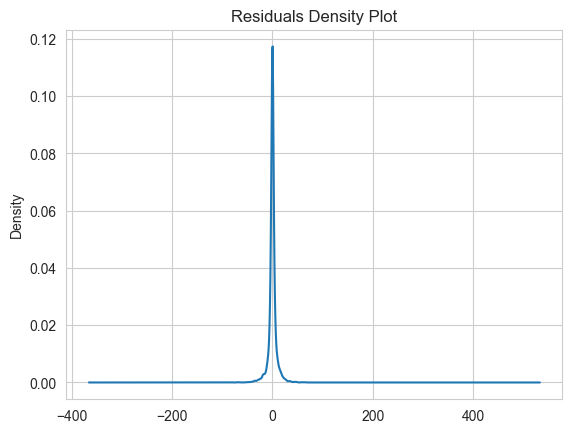

RMSE: 547.5212344151489


In [13]:
# Residual analysis
residuals = model_fit.resid
residuals.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Forecast accuracy
from sklearn.metrics import mean_squared_error

predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


In [14]:
!pip install skforecast

In [15]:
!pip install --upgrade skforecast

In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 12.6 MB/s eta 0:00:10
   - -------------------------------------- 4.5/124.9 MB 12.8 MB/s eta 0:00:10
   -- ------------------------------------- 7.3/124.9 MB 13.0 MB/s eta 0:00:10
   --- ------------------------------------ 10.2/124.9 MB 12.8 MB/s eta 0:00:09
   ---- ----------------------------------- 13.1/124.9 MB 12.8 MB/s eta 0:00:09
   ----- ---------------------------------- 15.7/124.9 MB 13.0 MB/s eta 0:00:09
   ----- ---------------------------------- 18.6/124.9 MB 12.9 MB/s eta 0:00:09
   ------ --------------------------------- 21.5/124.9 MB 12.9 MB/s eta 0:00:08
   ------- -------------------------------- 24.4/124.9 MB 13.0 MB/s eta 0:00:08
   -------- ------------------------------- 27.0/124.9 MB 13.0 MB/s eta 0:00:08
   --------- ------------------------------ 29.9/124.9 MB 13.0 MB/s eta 0:00:08
   ---------- ----------------------------- 32.5/124

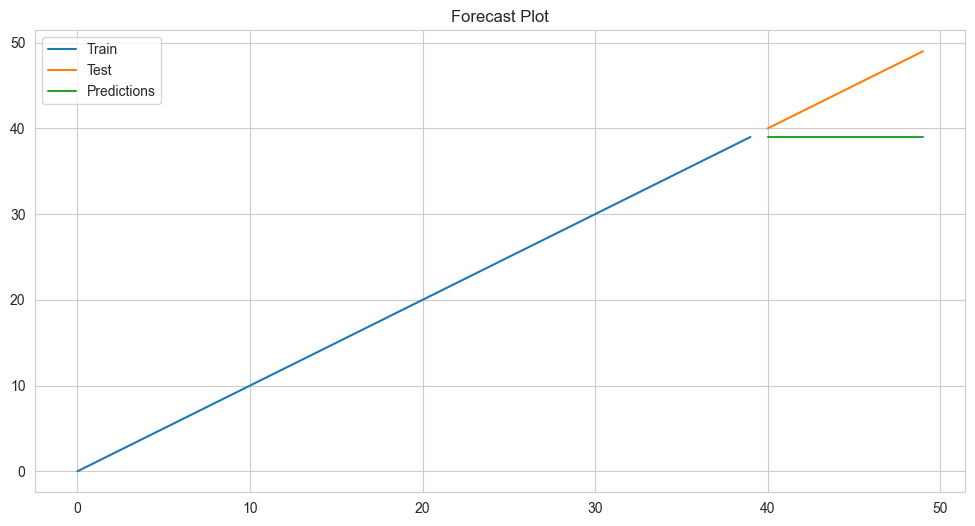

MSE: 38.51351316651562, MAE: 5.501228332519531


In [19]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster, backtesting_forecaster
from joblib import dump, load
from xgboost import XGBRegressor, plot_importance, plot_tree
import matplotlib.pyplot as plt

# Sample data
data = pd.Series([i for i in range(50)])

# Split the data
train = data[:40]
test = data[40:]

# Initialize the forecaster
forecaster = ForecasterAutoreg(
    regressor=XGBRegressor(),
    lags=5
)

# Train the forecaster
forecaster.fit(y=train)

# Predict
predictions = forecaster.predict(steps=len(test))

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
train.plot(ax=ax, label='Train')
test.plot(ax=ax, label='Test')
predictions.plot(ax=ax, label='Predictions')
ax.legend()
plt.title('Forecast Plot')
plt.show()

# Calculate metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f'MSE: {mse}, MAE: {mae}')


In [22]:

val_date = '2023-10-06 09:36:00'
metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = df['USD'],
    initial_train_size = len(df.loc[:val_date]),
    fixed_train_size   = False,
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False # Change to True to see detailed information
)


100%|██████████| 338/338 [00:02<00:00, 118.87it/s]


In [23]:
print(f"Backtest error: {metric}")

Backtest error:    mean_squared_error
0       490933.126797


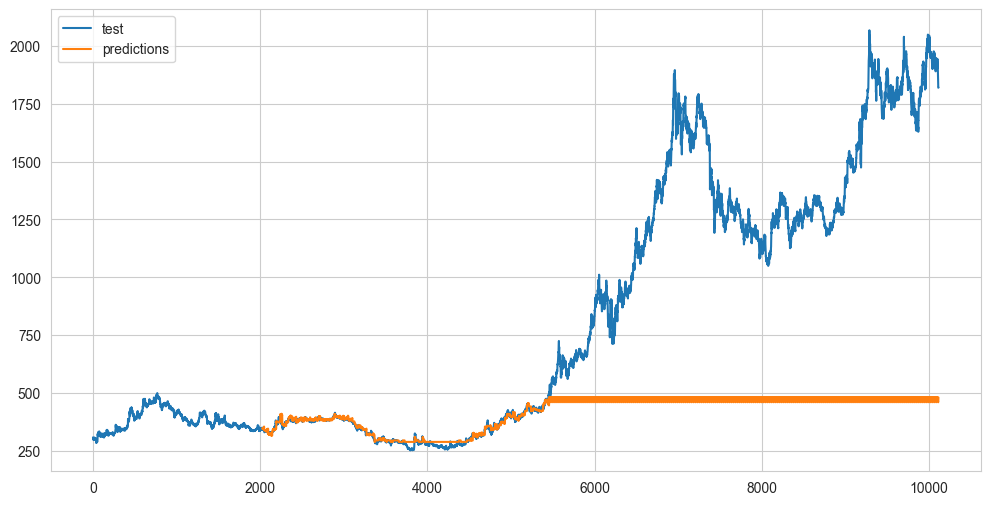

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
test = df['USD'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.legend();


In [ ]:


metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = df['USD'],
    initial_train_size = len(daily1.loc[:val_date]),
    fixed_train_size   = False,
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False # Change to True to see detailed information
)

ModuleNotFoundError: No module named 'skforecast'

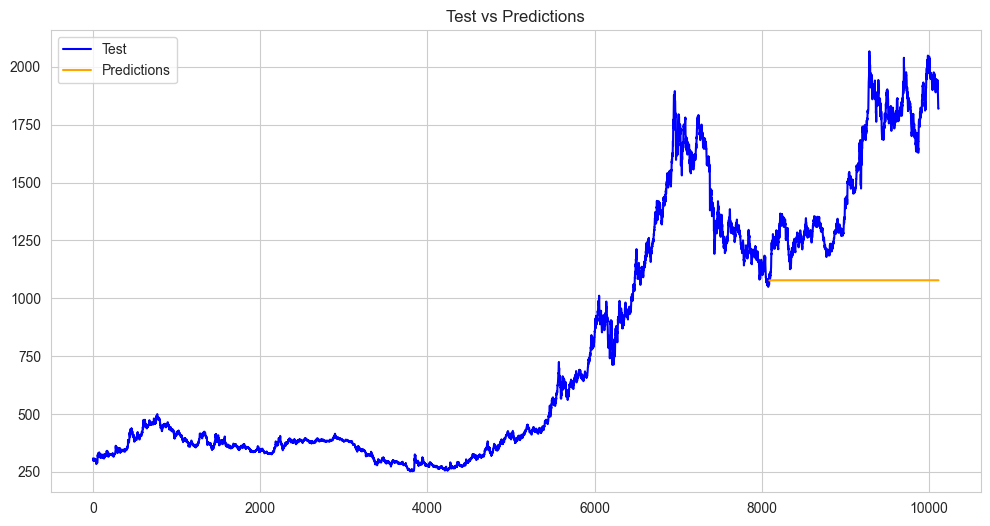

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'test' is correctly extracted from df
test = df['USD']

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
test.plot(ax=ax, label='Test', color='blue')
predictions.plot(ax=ax, label='Predictions', color='orange')
ax.legend()
ax.set_title('Test vs Predictions')
plt.show()


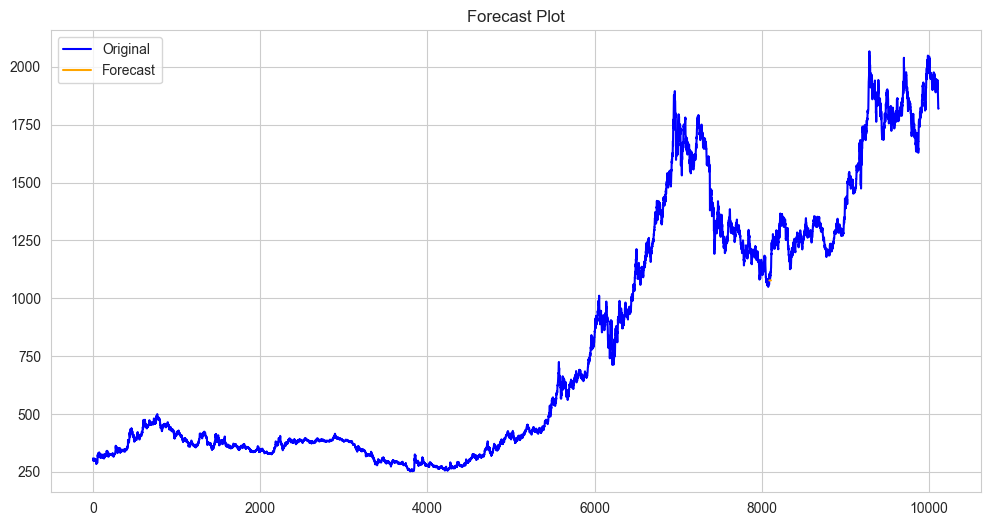

In [ ]:
forecast = model_fit.forecast(steps=20)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['USD'], label='Original',color='blue')
plt.plot(forecast.index, forecast, label='Forecast',color='orange')
plt.legend()
plt.title('Forecast Plot')
plt.show()